In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import seaborn as sns
sns.set(style='ticks')

/home/camila/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# load train, test, and dev sets
train_x = np.load('v2_train_x.npy')
train_y = np.load('v2_train_y.npy')

test_x = np.load('v2_test_x.npy')
test_y = np.load('v2_test_y.npy')

dev_x = np.load('v2_dev_x.npy')
dev_y = np.load('v2_dev_y.npy')

# pre-processing data: transforming each feature to have zero mean and unit variance. To avoid risk analysis
# being skewed by certain features dominating the variance._x)
scaler = StandardScaler().fit(train_x)
X_train_scaled = pd.DataFrame(scaler.transform(train_x))
X_test_scaled = pd.DataFrame(scaler.transform(test_x))
X_dev_scaled = pd.DataFrame(scaler.transform(dev_x))

In [3]:
def RF_parameter_tuning(n_est, depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, oob_score=False, random_state=0)
    rf.fit(X_train_scaled, np.ravel(train_y))

    # predicted_test = rf.predict(X_test_scaled)
    predicted_test = rf.predict(X_dev_scaled)

    test_score = r2_score(dev_y, predicted_test)
    pearson = pearsonr(np.ravel(dev_y), predicted_test)

#     test_score = r2_score(test_y, predicted_test)
#     pearson = pearsonr(np.ravel(test_y), predicted_test)

    return test_score, pearson

In [4]:
n_estimators = [10, 30, 60, 100, 250, 500]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8 , 9 , 10, 12, 15, 20]
perms = len(n_estimators) * len(max_depth)

results = np.zeros((perms, 4))
i = 0

for n_est in n_estimators:
    for depth in max_depth:
        test_score, pearson = RF_parameter_tuning(n_est, depth)
        results[i, 0] = n_est
        results[i, 1] = depth
        results[i, 2] = test_score
        results[i, 3] = pearson[0]
        i += 1

df = pd.DataFrame(results)
df.columns = ['n_estimators', 'max_depth', 'r2_score', 'pearson']

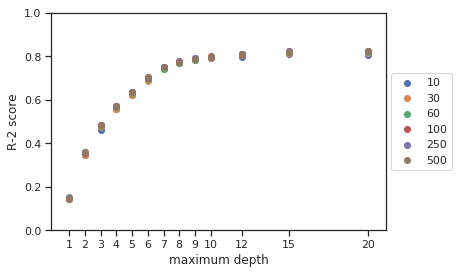

In [5]:
for n in n_estimators:
    data = df[df['n_estimators'] == n]
    plt.scatter(data['max_depth'], data['r2_score'], label=str(n))
plt.xticks(max_depth)
plt.ylim([0, 1])
plt.xlabel('maximum depth')
plt.ylabel('R-2 score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig('2EDIT_RF_optimization_n_estimators.svg', bbox_inches='tight', dpi=600)
plt.show()

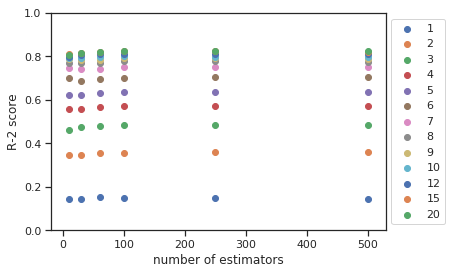

results


In [6]:
for depth in max_depth:
    data = df[df['max_depth'] == depth]
    plt.scatter(data['n_estimators'], data['r2_score'], label = str(depth))
plt.ylim([0, 1])
plt.xlabel('number of estimators')
plt.ylabel('R-2 score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig('2EDIT_RF_optimization_max_depth.svg', bbox_inches='tight', dpi=600)
plt.show()

print('results')